# Running an inference for images containing blur

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
tf.__version__

'2.13.0'

In [105]:
trained_model = load_model('model/blur/blur_detect.h5') 
glareCNN = tf.keras.models.load_model('model/glare/glare_detect.h5')
source_dir = "C:\\Users\\trade\\OneDrive\\Documents\\GitHub\\pretrained-image-quality-cnn\\all_images\\"

 

buffr_blur = []
score_blur = []
pred_blur = []


buffr_glare=[]
pred_glare=[]
score_glare=[]

name=[]

image_array=[]
for i in os.listdir(source_dir):

    #blur check 
    img = tf.keras.preprocessing.image.load_img(source_dir+i,target_size = (128,128))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    image_array.append(x)
    
    classes = trained_model.predict(x/255)
    buffr.append(img)
    score_blur.append(classes)
    name.append(i)
    if classes[0][0]<0.9:
        pred_blur.append("blur")
    else:
        pred_blur.append("not blur")


     #glare check    
    test_image1 = tf.keras.preprocessing.image.load_img(source_dir+i, target_size = (64,64))
    test_image2 = tf.keras.preprocessing.image.img_to_array(test_image1) #convert PIL image to array
    test_image2 = np.expand_dims(test_image2, axis = 0) #expand image dimensions to make it compatible with CNN input
    glare = glareCNN.predict(test_image2/255) #Values in the array scaled from [0,255] -> [0,1]

    score_glare.append(glare)
    if glare[0][0] <0.6: #CNN model refers to 0 as "glare" and 1 as "not glare", applying a threshold for both cases.
        pred_glare.append("Glare")
    else:
        pred_glare.append("Not Glare") #values greater than 0.5

    
print(image_array)  

1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step
[array([[[[ 52.,  85., 138.],
         [ 54.,  88., 134.],
         [ 57.,  90., 143.],
         ...,
         [102., 153., 200.],
         [100., 151., 198.],
         [ 97., 148., 195.]],

        [[ 54.,  87., 140.],
         [ 57.,  91., 137.],
         [ 59.,  92., 145.],
         ...,
         [105., 156., 203.],
         [102., 153., 200.],
         [100., 151., 198.]],

        [[ 57.,  90., 143.],
         [ 59.,  93., 139.],
         [ 57.,  98., 142.],
         ...,
         [107., 159., 199.],
         [105., 157., 197.],
         [102., 153., 200.]],

        ...,

        [[ 59.,  65.,  63.],
         [ 57.,  63.,  61.],
         [ 74.,  80.,  78.],
         ...,
         [ 39.,  44.,  73.],
         [ 37.,  45.,  91.],
         [ 46.,  55.,  98.]],

        [[ 62.,  68.,  66.],
         [ 62.,  68.,  66.],
         [ 62.,  68.,  66.],
         ...,
         [ 32.,  42.,  44.],
         [ 36.,  51.,  56.],
         [ 41.

#### Results

In [103]:
# print(x)
# for j in range(len(results[0])):
#     print(name[j],score_glare[j],pred_glare[j])
    
import numpy as np

# Your original data (replace this with your actual data)
original_data = np.array()

# Number of bootstrap samples to generate
num_samples = 1000  # You can change this to any desired number

# List to store the resampled statistics (e.g., mean, median, etc.)
bootstrap_statistics = []

# Perform bootstrapping
for _ in range(num_samples):
    # Randomly sample with replacement from the original data
    bootstrap_sample = np.random.choice(original_data, size=len(original_data), replace=True)
    
    # Calculate the statistic of interest (e.g., mean)
    statistic = np.mean(bootstrap_sample)  # You can change this to any desired statistic
    
    # Append the statistic to the list
    bootstrap_statistics.append(statistic)

# Convert the list of bootstrap statistics to a NumPy array
bootstrap_statistics = np.array(bootstrap_statistics)

# Compute confidence intervals or other statistics based on the bootstrapped data
confidence_interval = np.percentile(bootstrap_statistics, [2.5, 97.5])

# Print the results
print("Bootstrap Statistics Mean:", np.mean(bootstrap_statistics))
print("Bootstrap Statistics Std. Dev.:", np.std(bootstrap_statistics))
print("95% Confidence Interval:", confidence_interval)


[[[[ 43.  72. 114.]
   [ 46.  75. 117.]
   [ 46.  75. 117.]
   ...
   [ 48.  77. 119.]
   [ 46.  75. 117.]
   [ 46.  76. 114.]]

  [[ 46.  75. 117.]
   [ 46.  75. 117.]
   [ 48.  77. 119.]
   ...
   [ 51.  80. 122.]
   [ 48.  77. 119.]
   [ 46.  76. 114.]]

  [[ 46.  75. 117.]
   [ 48.  77. 119.]
   [ 48.  77. 119.]
   ...
   [ 53.  83. 121.]
   [ 51.  81. 119.]
   [ 48.  78. 116.]]

  ...

  [[ 59.  68.  75.]
   [ 59.  68.  75.]
   [ 61.  70.  77.]
   ...
   [ 92. 110. 120.]
   [ 93. 110. 126.]
   [ 85. 102. 118.]]

  [[ 59.  68.  75.]
   [ 61.  70.  77.]
   [ 61.  70.  77.]
   ...
   [ 52.  70.  80.]
   [ 67.  84. 100.]
   [ 62.  79.  95.]]

  [[ 59.  68.  75.]
   [ 61.  71.  73.]
   [ 61.  70.  77.]
   ...
   [115. 126. 122.]
   [112. 122. 124.]
   [ 99. 108. 117.]]]]


IndexError: list index out of range

In [ ]:
test=[]

for i in range(0,196): 
    test.append([name[i],pred[i]])
print(test[-1])

truth = []

for i in range(0, 196):
    if i in [6, 19, 34,60,102,122,123,124,162,176]:
        truth.append(["destination" + str(i) + ".jpg", "blur"])
    else:
        truth.append(["destination" + str(i) + ".jpg", "not blur"])
print(truth[0:3])


In [58]:
# Assuming you have the 'truth' and 'test' lists defined

# Create dictionaries to store the blur status for each destination
truth_dict = {item[0]: item[1] for item in truth}
test_dict = {item[0]: item[1] for item in test}

# Iterate through the destinations in one of the lists (e.g., 'truth')
for image, truth_label in truth_dict.items():
    test_label = test_dict.get(image, None)  # Get the corresponding label from 'test' or None if not found
    
    if test_label is not None:
        if truth_label != test_label:
            print(f"Destination {image} has different labels: truth - {truth_label}, test - {test_label}")
    else:
        print(f"Destination {image} not found in 'test'")


Destination destination0.jpg not found in 'test'
Destination destination19.jpg has different labels: truth - blur, test - not blur
Destination destination34.jpg has different labels: truth - blur, test - not blur
Destination destination48.jpg has different labels: truth - not blur, test - blur
Destination destination89.jpg has different labels: truth - not blur, test - blur
Destination destination115.jpg has different labels: truth - not blur, test - blur
Destination destination124.jpg has different labels: truth - blur, test - not blur
Destination destination176.jpg has different labels: truth - blur, test - not blur


In [60]:
for i in range(1,196):
    print(name[i],score[i],pred[i])

destination10.jpg [[0.9962666]] not blur
destination100.jpg [[0.96381485]] not blur
destination101.jpg [[0.96381485]] not blur
destination102.jpg [[0.863792]] blur
destination103.jpg [[0.96381485]] not blur
destination104.jpg [[0.96381485]] not blur
destination105.jpg [[0.96381485]] not blur
destination106.jpg [[0.96381485]] not blur
destination107.jpg [[0.96381485]] not blur
destination108.jpg [[0.96381485]] not blur
destination109.jpg [[0.96381485]] not blur
destination11.jpg [[0.9994075]] not blur
destination110.jpg [[0.99760604]] not blur
destination111.jpg [[0.99798304]] not blur
destination112.jpg [[0.9892229]] not blur
destination113.jpg [[0.9892229]] not blur
destination114.jpg [[0.9892229]] not blur
destination115.jpg [[0.5098517]] blur
destination116.jpg [[0.9892229]] not blur
destination117.jpg [[0.9892229]] not blur
destination118.jpg [[0.9892229]] not blur
destination119.jpg [[0.9892229]] not blur
destination12.jpg [[0.9997746]] not blur
destination120.jpg [[0.9892229]] no

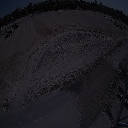

In [40]:
buffr[27]

In [25]:
print(score[1],pred[1])

[[0.9962666]] not blur


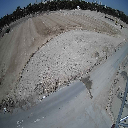

In [26]:
buffr[2]

In [8]:
print(score[2],pred[2])

[[0.979802]] not blur
